In [1]:
url = 'https://https://www.kaggle.com/yelp-dataset/yelp-dataset'

### Supervised Learning Capstone

### Capstone Topic:  Supervised Learning with Sentiment Analysis of Yelp customer reviews

### Student:  Lou Pendley Thinkful

### 26-Jun-2019

#### Specific items to cover:

1.  #### Research question that this model addresses:
    #### Can we predict the number of stars for a Yelp rating from the review provided by the customer?  
    
1.  #### How did I choose my model specifications and against what alternatives did I compare it?
#### This was my performance criteria for this capstone:
    1. #### Model needed to complete in a reasonable amount of time, with minimal parameter tuning of either the vectorizer, or the model, using a classifier model, and have accuracy of at least 80%.  Measuring for both accuracy and performance, providing readouts for both.
    
    
####  I chose a classifier model suitable for sentiment analysis, and chose from these 5 models:  
1. #### Random Forests
2. #### Support Vector Machines
3. #### Naive Bayes
4. #### MultiNomial Naive Bayes
5. #### Logistic Regression
    
####    In addition, I experimented with 2 classifier tokenizers for the model:
1. #### CountVectorizer
1. #### TfidfVectorizer
    
    
#### My findings on the 5 models attempted above:

1. Random Forests - RFC
With the dataset from Kaggle, RFC was not sufficiently performant using either CountVectorizer, or TfidVectorizer, in relation to the timings of the other models.  Several of my test runs did complete in several hours, and I realized that it could be due to reasons such as, or things I could do to make the model work including:
    1. Resource depletion - running on my Mac has limitations
    1. Feature reduction - limiting the words that are features
    1. Manipulate the model - by adjusting parameters in the model, or in TfidffVectorizer.  There are numerous combinations of parameters, which can take vast amounts of time running on a Mac.  Running in the cloud with scalable resources could provide quicker and more timely feedbac, and thus more iterations.
       
2. Support Vector Machines - SVC  
SVC was another candidate that suffered from the items I described in RFC.  It could be that there are parameters that could optimize this, but this is my first time to use SVC for sentiment analysis. 
       
1. Naive Bayes - BernoulliNB  
Testing with this model using different parameters, and combinations of CountVectorizer, and TfidfVectorizer resulting in adequate performance.  
       
4. MultiNomial Naive Bayes - MultinomialNB  
This model was initially my pick to be the most performant, but another classifier was better.  This model seemed to be a good fit, and many models on the web promoted this as the goto model for sentiment analysis.
       
5. Logistic Regression - LR  
This model was not my first pick, but it fits in exactly what I am trying to do -- get a binary classifier that predicts if the sentiment of the review can yield a positive or negative rating, given positive is 4 starts or better, and below 4, as negative.  The 3 stars rating representing 60% constitutes negative.  It is unfortunate, that a 0 rating is not possible.
       
Discoveries in my testing:
    
1.  Iterating through the different models, and varying parameters to find the best fit can take a long, long time.  Perhaps optimizations can help on this.  This may come through wisdom and experience.
2.  Given the numerous parameters on some of the models, finding the right combination of n parameters could use some extra computing resources or wisdom to shorten the iteration times.
3.  It may be worthwhile in future capstones to use cloud computing to spend less time waiting for my limited resources to complete the tests.    

### Practical Uses of the Model

#### This model is very valuable in many ways.

#### Once trained, and optimized for performance, which is beyond the scope of this capstone, these are some of the things that could be of great business value:

1. Sentiment analysis in real time, while providing a review, and potentially linking up an unhappy customer with a discounted "next visit" special.
1. Daily sentiment temperature for business owners that use Yelp, to see if the reviews are going up, down, or level for a given business period - daily, weekly, monthly, and reaching out to those customers in some way.
1. Applying this same model to e-mails from customers/vendors/employees to measure sentiment, and to be proactive.
1. With modifications, determine if fake reviews are being submitted, and to stop them.

### The Dataset

The Yelp dataset that originiated from Kaggle includes 5.2 million Yelp user reviews for 174,000 business, spanning 11 metropolitan cities around the world.  I am a Rubio's  
The reviews look something like this:  
<img src="YelpReview.png"/>

#### Dataset components:
1. review_id  
An internal id from Yelp
1. user_id  
An internal user id from Yelp.
1. business_id  
An internal business id from Yelp.
1. stars  
The number of stars that a review was given by a reviewer.  1 being the worst, and 5 being the best.
1. useful
This is another rating that a person reading the review can provide as a rating of usefulness.
1. funny  
This is another level of review that a person reading the review can provide as a rating of funny.
1. cool  
This is another level of review that a person reading the review can provide as a rating of cool.
1. text  
This is a free form text review field, that can be up to 5,000 characters.
1. date  
Date of review.

### More Model Information:

_We are correlating the sentiment analysis from the review with the stars rating that a customer provided.  We want to predict the stars rating from the customer review._    
_The dataset includes 5.2 million Yelp user reviews for 174,000 businesses, spanning 11 metropolitan cities._  
_There really is nothing missing from the data.  It includes the review star rating, and the feedback, from which we derive the sentiment, thanks to machine learning, and some great sklearn libraries._   
_Since this is sentiment data, the libraries remove them, by filtering on the max_\__df parameter in TfidfVectorizer._ 


<h1><center>Performance Results by model</center></h1>



|Model|Accuracy|Elapsed Time|Performance Best|Accuracy Placing
|:-------|:-------|:------|:-----|:---|
|Bernoulli Naive Bayes|75.81%|11 minutes|2nd place|3rd place|
|Multinomial Naive Bayes|85.98%|10 minutes|1st place|2nd place|
|Logistic Regression|91.08%|15 minutes|3rd place|1st place|

#### Depending on the requirements for the model, we have optimization by performance, and accuracy.  The use case would determine which model to use.

In [2]:
# Constants
random_state           = 57
train_size             = 0.90
test_size              = 0.10
max_data               = 6685900//1
rfc_test_size          = 50000
rfc_train_size         = 5000
run_CountVectorizer    = True
run_TfidfVectorizer    = True
sample_size            = 10
BegTimeStampNewlines   = 3
EndTimeStampNewlines   = 3
EndTimeStamp           = '\n'*EndTimeStampNewlines+'End'
BegTimeStamp           = 'Begin'+'\n'*BegTimeStampNewlines

# Regression/Classification control
Regression = False 

print("Regression = {}".format(Regression))

Regression = False


In [3]:
# Controls
flag_to_run_rf = False
flag_to_plot_them = False
flag_to_run_correlation_matrix = False
flag_to_run_features_importance = False
flag_to_run_gradient_boosting  = False
flag_to_run_linear_regression  = False
flag_to_run_logistic_regression = False
flag_to_run_lasso_regression = False
flag_to_run_ridge_regression = False
flag_to_run_svc = False
flag_to_run_vectorizer_nb = False
flag_to_run_sentiment_analyzer = True
debug = False

In [4]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import json
import time, sys
import chardet
import datetime

%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas_ml import ConfusionMatrix
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Markdown, display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from IPython.display import HTML, display

import requests
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# from tqdm import tqdm

In [5]:
# pd set preferences.
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)

In [6]:
def plot_time_to_complete():
    objects = ('BernoulliNB', 'MultinomialNB', 'Logistic Regression')
    y_pos = np.arange(len(objects))
    performance = [18,17,32]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Time in Minutes')
    plt.title('Yelp Sentiment Analysis Time to Complete')

    plt.show()

In [7]:
def plot_model_accuracy():
    objects = ('BernoulliNB', 'MultinomialNB', 'Logistic Regression')
    y_pos = np.arange(len(objects))
    performance = [75.81,85.98,91.08]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy Percent')
    plt.title('Yelp Sentiment Analysis Accuracy')

    plt.show()

In [8]:
def file_length(full_file_name):
    count = 0
    for line in open(full_file_name).readlines(  ): 
        count += 1
    return count

In [9]:
def write_to_logfile(message, mdformat=''):
    bufsize = 0
    with open('TestResults.md', 'a+') as the_file:
        the_file.write('{} {}'.format(mdformat, message))

In [10]:
def print_timestamp(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    printFormatted("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [11]:
def return_current_datetime():
    datetime_now = str(datetime.datetime.now())
    return datetime_now

In [12]:
def file_stuff():

    global df
    
    file = 'yelp_academic_dataset_review.json'# /Users/lou/GITHubProjects/Thinkful/Datafiles/yelp/yelp_academic_dataset_review.json
    path = path="../../../../Datafiles/yelp/"
    column_names = []

    if debug == True:
        print_timestamp("Log start get filecount")
    file_line_count = file_length(path+file) # 

    file_len = file_length(path+file)
    file_len = 0
    
    if debug == True:
        print_timestamp("There are {:,} lines in data file {}.".format(file_len, file))

    line = None
    data = []
    cnt = 0
    if isinstance(max_data, float):
        max_data2 = max_data * file_len # it's a factor of the full file size
    elif isinstance(max_data, int):
        max_data2 = max_data # it's the number of records in the file

    # Load the first sheet of the JSON file into a data frame
#     print("url for read_json is {}".format(url))
#     df = pd.read_json(url, encoding='utf-8')

    with open(path+file, 'r',encoding='UTF-8') as f:
      line = f.readline()
      while line and cnt < max_data2:
        data.append(json.loads(line))
        line = f.readline()
        cnt += 1
    if debug == True:
        print_timestamp("Log end read datafile {}".format(file))

    column_names = ['review_id', 'user_id', 'business_id', 'stars', 'useful','funny','cool','text', 'date']
    df = pd.DataFrame(data, columns = column_names)
    
    if debug == True:
        print_timestamp("there are {:,} entries in  {}".format(len(df), 'data frame df'))
        print_timestamp("columns={}".format(df.columns))

    # data Cleanup

    df['sentiment_label'] = df.stars.map({4.0:1, 5.0: 1, 3.0:0, 2.0: 0, 1.0:0}) # Let's conver the stars values into success(1.0) or fail(0)
    df = df.rename({'text': 'message'}, axis=1)
    df['message_length'] = df['message'].str.len()
    
    if debug == True:
        print_timestamp("columns are {}".format(df.columns))

        print_timestamp('we have cleaned up the dataframe.')

In [13]:
def plot_facet():
    g = sns.FacetGrid(data=df, col='stars')
    g.map(plt.hist, 'message_length', bins=50)

In [14]:
def plot_boxplot():
    sns.boxplot(x='stars', y='message_length', data=df)

In [15]:
def confusion_matrix_function(y_test, y_pred_class):
    
    printFormatted("### Confusion Matrix")
    print(confusion_matrix(y_test, y_pred_class))
    
    print("\n\n")

In [16]:
def make_X_and_Y():
        
    global X, y
    
    # Definine outcome and predictors.

    y = df['sentiment_label']
    X = df['message']
    
    if debug == True:
        print_timestamp("X and y variables created")

In [17]:
def printFormatted(string):
    newline = '\n'
    display(Markdown(string))
    write_to_logfile(string+newline)

In [18]:
def plot_them():
    for column in X_train.columns:
#         plt.hist(X_train[column]*100, bins=40)
        plt.scatter(y_train, X_train[column]*100)
        plt.xlabel(column)
        plt.show()

In [19]:
def training_test_set():
    
    global X_train, X_test, y_train, y_test
    
    if debug == True:
        printFormatted("test_size={}, and train_size={}".format(test_size,train_size))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size)
    
    if debug == True:
        printFormatted("train_size = {}, X_train is {}, and y_train is {}".format(train_size, X_train.shape, y_train.shape))
        printFormatted("test_size  = {}, X_test  is {}, and y_test is {}".format(test_size, X_test.shape, y_test.shape))

In [20]:
def plot_them_others(df,columnlist):
    
    print_timestamp(BegTimeStamp)
    
    print_timestamp("We will plot these independent variables {}".format(columnlist))
    for column in columnlist:
        plt.hist(df[column], bins=90)
        plt.xlabel(column)
        plt.ylabel('count')
        plt.show()
#     dfcolumn.plot.hist()

    print_timestamp(EndTimeStamp)

In [21]:
def data_characteristics():
    
    printFormatted("#### Columns used in the dataset")
    display(df.columns)

    print("\n\n")
    printFormatted("#### Describe of the df dataset")
    display(df.describe())

    print("\n\n")
    printFormatted("#### Sample of 10 from the dataset")
    display(df.sample(sample_size))

    print("\n\n")
    printFormatted("#### Number of nulls in X")
    display(X.isnull().sum())
    print("\n\n\n")

In [22]:
def run_correlation_matrix():
    
    print_timestamp(BegTimeStamp)
    
    # Setup the correlation matrix.
    corrmat = X.corr()
    print(corrmat)

    # Set up the subplots
    f, ax = plt.subplots(figsize=(12, 9))

    # Let's draw the heatmap using seaborn.
    sns.heatmap(corrmat, vmax=.6, square=True)
    plt.show()
    
    print_timestamp(EndTimeStamp)

Let's try predicting with gradient boosting classification

In [23]:
def sentiment_analyzer(path, parameters, classifier, tfidf_parms):
    # path A = the old path
    # path B = the new path, no CountVectorizer at all
    
    
# run block of code and catch warnings
  
    if debug == True:
        print_timestamp(BegTimeStamp+" running with path={}".format(path))
    
    global vectorized
    vectorized = True
    
    pipeline_array = []
   
    if path == "A":
        if classifier == 'bnb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   BernoulliNB(**parameters))
            ]))
        elif classifier == 'svc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   SVC(kernel = 'linear', **parameters))
            ])) 
        elif classifier == 'mlb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   MultinomialNB(**parameters))
            ]))
        elif classifier == 'logit':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   LogisticRegression(**parameters))
            ]))
        elif classifier == 'rfc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   ensemble.RandomForestClassifier(**parameters))
            ]))  
            
    elif path == "B":
        if classifier == 'bnb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   BernoulliNB(**parameters))
            ]))
        elif classifier == 'svc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   SVC(kernel = 'linear', **parameters))
            ])) 
        elif classifier == 'mlb':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   MultinomialNB(**parameters))
            ]))
        elif classifier == 'logit':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf',   LogisticRegression(**parameters))
            ]))
        elif classifier == 'rfc':
            pipeline_array.append(Pipeline([
                ('tfidf', TfidfVectorizer(**tfidf_parms)),
                ('clf',   ensemble.RandomForestClassifier(**parameters))
            ]))

    pipe = pipeline_array[0]
    
    try:
        vect_name_list = str(pipe.named_steps['vect']).split('(')
        vect_name = "vect = {}, ".format(vect_name_list[0])
    except:
        vect_name = ''

    classifier_name_list=str(pipe.named_steps['clf']).split('(')
    classifier_name=classifier_name_list[0]
    tfidf_name_list = str(pipe.named_steps['tfidf']).split('(')
    if len(tfidf_name_list) > 0:
        tfidf_name = tfidf_name_list[0]
    else:
        tfidf_name = ''

    printFormatted("####  Now running with: {} tfidf={} and clf={} {}\nparameters={} \n\n tfidf_parms={}".format( vect_name,
                                                                                                tfidf_name,
                                                                                                classifier_name,
                                                                                                return_current_datetime(),
                                                                                                parameters,
                                                                                                tfidf_parms
                                                                                                ))
    pipe.fit(X_train, y_train)

    y_pred_class  = pipe.predict(X_test)
    y_pred_class2 = pipe.predict(X_train)

    metrics_test_score =  metrics.accuracy_score(y_test, y_pred_class)
    metrics_train_score = metrics.accuracy_score(y_train, y_pred_class2)

    printFormatted('###  Metrics test accuracy score = {:.2%} with {}'.format(metrics_test_score, classifier_name))
    printFormatted('###  Metrics train accuracy score = {:.2%} with {}'.format(metrics_train_score, classifier_name))
    
    if debug == True:
        printFormatted("Steps information: {}".format(pipe.steps))
        print_timestamp("Finished running pipeline with:\n{}: ".format(classifier_name))
            
    return y_test, y_pred_class

    print_timestamp(EndTimeStamp)

In [24]:
def run_it():
    
    if debug == True:
        print_timestamp(BegTimeStamp)
   
    if debug == True:
        if Regression == True:
            print_timestamp("We are running with a Regression model")
        elif Regression == False:
            print_timestamp("We are running with a Classifier model")
        else:
            print_timestamp("We have failed to set the Regression variable")
            sys.exit(main())
        
    if flag_to_plot_them == True:
        if debug == True:
            print("we went to flag_to_plot_them")
        columns_to_plot = ['funny','cool','useful','message_length','sentiment_label']
        plot_them_others(df, columns_to_plot)
        
#         plot_them()

    if flag_to_run_features_importance == True:
        
        number_of_features_to_consider = 50
        params = {'n_estimators': 100}

        if Regression == True:
            if debug == True:
                print_timestamp('We are running RandomForestRegressor')
            rf = ensemble.RandomForestRegressor(**params)
            
        else:
            if debug == True:
                print_timestamp('We are running RandomForestClassifier')
            rf = ensemble.RandomForestClassifier(**params)

        run_features_importance(rf, number_of_features_to_consider)

    if flag_to_run_correlation_matrix == True:
        run_correlation_matrix()

    if flag_to_run_rf == True:
        #     params = {}
        params = {'n_estimators': 100} 

        if Regression == True:
            rf = ensemble.RandomForestRegressor(**params)
            if debug == True:
                print_timestamp('We are running RandomForestRegressor')
        else:
            rf = ensemble.RandomForestClassifier(**params)
            if debug == True:
                print_timestamp('We are running RandomForestClassifier')

        run_rf(rf)

    if flag_to_run_gradient_boosting  == True:
        run_gradient_boosting()

    if flag_to_run_linear_regression  == True:
        run_linear_regression()

    if flag_to_run_logistic_regression == True:
        run_logistic_regression()

    if flag_to_run_svc == True:
        run_svc() 

    if flag_to_run_ridge_regression == True:
        run_ridge_regression()
        
    if flag_to_run_sentiment_analyzer == True:
        path = "B"


        for path in ['A']:
            for vectorizer_iterator in ['logit', 'mlb', 'bnb']:
                if vectorizer_iterator == 'rfc':
                    y_test, y_pred_class = sentiment_analyzer(path, params, vectorizer_iterator, tfidf_parms)
                    confusion_matrix_function(y_test, y_pred_class)
                elif vectorizer_iterator == 'bnb':
                    parameters = {}
                    y_test, y_pred_class = sentiment_analyzer(path, parameters, vectorizer_iterator, tfidf_parms)
                    confusion_matrix_function(y_test, y_pred_class)
                elif vectorizer_iterator == 'mlb':
                    parameters = {}
                    y_test, y_pred_class = sentiment_analyzer(path, parameters, vectorizer_iterator, tfidf_parms)
                    confusion_matrix_function(y_test, y_pred_class)
                elif vectorizer_iterator == 'logit': # newton-cg took too long. sag and saga about the same as lbfgs.
                    tfidf_parms = {
                        'max_features' :  10000 # determined this through iterative testing
                    }
                    parameters = {'C' :1e20, 'solver': 'lbfgs', 'max_iter': 1000} # max_iter=100 reports warning, try 1000
                    y_test, y_pred_class = sentiment_analyzer(path, parameters, vectorizer_iterator, tfidf_parms)
                    confusion_matrix_function(y_test, y_pred_class)
                elif vectorizer_iterator == 'svc':
                    parameters = {}
                    y_test, y_pred_class = sentiment_analyzer(path, parameters, vectorizer_iterator, tfidf_parms)
                    confusion_matrix_function(y_test, y_pred_class)

    print_timestamp(EndTimeStamp)

In [25]:
def main(entry_point):
    if entry_point == 0:
        print_timestamp("Starting main()")
        file_stuff()
        make_X_and_Y()
        training_test_set()
        data_characteristics()
        plot_time_to_complete()
        plot_model_accuracy()
        plot_facet()

    run_it()
        
    print_timestamp("Ending main()")

2019-07-07 16:54:58: In: main Starting main() 

#### Columns used in the dataset

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'message', 'date', 'sentiment_label', 'message_length'], dtype='object')

#### Describe of the df dataset

,stars,useful,funny,cool,sentiment_label,message_length
count,6685900.000,6685900.000,6685900.000,6685900.000,6685900.000,6685900.000
mean,3.716,1.354,0.483,0.579,0.658,602.798
std,1.464,3.700,2.379,2.359,0.474,568.875
min,1.000,-1.000,0.000,-1.000,0.000,1.000
25%,3.000,0.000,0.000,0.000,0.000,237.000
50%,4.000,0.000,0.000,0.000,1.000,425.000
75%,5.000,2.000,0.000,1.000,1.000,766.000
max,5.000,1241.000,1290.000,506.000,1.000,5000.000


#### Sample of 10 from the dataset

,review_id,user_id,business_id,stars,useful,funny,cool,message,date,sentiment_label,message_length
1333979,OFVZKpmLpM9ePzVak6esjw,ILOCl_PJXk_DE1enPkvL8Q,mUQ0ffOfaBn_E5kyZUkvOQ,4.000,0,0,1,"From the lady in the booth 4/28/15 1pm to the shuttle driver, all are very nice and friendly. Although there is a wait, but that is what you expect from taking shuttle service.",2015-04-28 20:20:41,1,176
253804,1j8IUIrhfqih2mUupFrseQ,H3KluKXf1mp3etCToCJhqg,dSEcQPPUlATxZf5pvN_t5Q,5.000,0,0,0,"Several of us who are blind visited this restaurant after an NFB meeting in Tempe. Wow, what a find! Our server was Alexa (just like the Amazon Echo) and she would get an A++++++ for helping us ...",2018-08-19 01:41:06,1,408
3640424,8OiZY8S90GAn1bceEt9axg,Ns4oV3sN4EnZIL2zJjM7VQ,dRDLwXHFLsMgpVMxNIRIiQ,1.000,0,0,1,I had driven by a few time finally decided to step in. Small family owned place. In think. Order the south Philly with the wiz. I won't do that again.it might be better without the wiz. Expected m...,2018-04-20 04:35:58,0,527
5441357,jay62Zv8dYaCqKCxOfVz3g,u9cWbmppqHUahCzDKO3dWQ,1dhPgc7E7IzzpxjHM2LphQ,5.000,0,0,0,One of my favorite places in Pittsburgh! 7dollar Big Azz Margaritas after 9!,2012-12-08 01:38:24,1,76
2783410,VtAA4g_phjDW519fcvhzCQ,aHkfC6e2zNJS-E4sasj6iw,owizJxXCdMYNHdYPOBKaUQ,4.000,1,0,0,"My fiancé and I came here for dinner. I had the garlic steak with brown rice. It was delicious!! Very flavorful and cooked medium rare. Rice was also cooked well, not dry or burnt like brown rice ...",2013-09-07 02:48:10,1,337
2026249,DGMuh6K4WuZd32sI5heZBQ,Nbmb4dYsfRBn2x-g-9_K5A,7j5yndEexyQn9cpVXLIIpw,5.000,0,0,0,"This place was delicious. I enjoyed every meat I tried and all the side dishes were fantastic as well. Even if I didn't eat meat I would have been satisfied with the large selection of appetizers,...",2014-04-19 23:56:11,1,250
2843264,j8yr4nuHxRK3vKbxoAvZ4Q,E4a6hcmgteQpkLuspWyLMA,LlpBt-qJ1ASS9lw28wZ04Q,3.000,0,1,0,"Pizza always good, but the wings are awful. They bake, so mushy and inedible. Ordered with 'buffalo sauce' but came covered in bbq sauce, then buffalo sauce on the side. Does that make sense to ...",2015-05-30 02:20:21,0,206
6663384,XrXQQtfnK7i4XLxVBRrMpQ,O2ASSka7du50Rl1vxmpNBA,zRs1RRYfRJQOA0nFwpJ4NQ,3.000,3,0,1,We're always looking for a good happy hour and Bahama Breeze has a pretty good one. Lots of drink specials and lots of food specials. The drinks are good but the food and service is just so so. ...,2018-06-30 00:19:35,0,306
5630850,yYlSj8ShYGX8uFASocCegg,Z0OGGj09qwJ8eYrziHmofQ,5OqrwhtZ3mcmUSwLINZTWQ,1.000,0,0,0,"The bar is excellent but when ordering food that's another story.... I ordered beef broccoli and got Beef broccoli stalks throughout my entire dish, chow fun noodles was TRASH!!!! In such a glorio...",2016-12-27 19:55:29,0,357
7192,uF0q0Fusxou3w9tdjI_uvA,ThTUwfNAdWrK6tKvl-Dtpw,SNuyBZuaCkhEjqAEhjuOrg,5.000,0,0,0,Awesome customer service! I finally upgraded and got so much help. The sparkling female there was so nice. She explained the difference from my old device to the new one I just decided on. She hel...,2016-05-07 03:16:58,1,446


#### Number of nulls in X

0

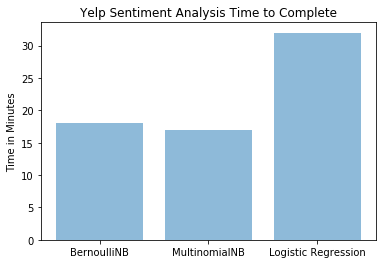

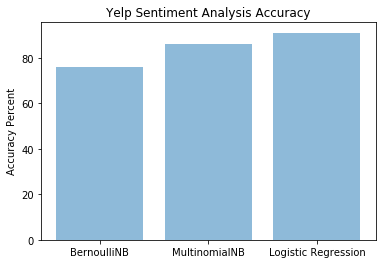

####  Now running with:  tfidf=TfidfVectorizer and clf=LogisticRegression 2019-07-07 16:58:53.036737
parameters={'C': 1e+20, 'solver': 'lbfgs', 'max_iter': 1000} 

 tfidf_parms={'max_features': 10000}

###  Metrics test accuracy score = 91.06% with LogisticRegression

###  Metrics train accuracy score = 91.12% with LogisticRegression

### Confusion Matrix

[[194147  34485]
 [ 25282 414676]]





####  Now running with:  tfidf=TfidfVectorizer and clf=MultinomialNB 2019-07-07 17:40:42.531751
parameters={} 

 tfidf_parms={'max_features': 10000}

###  Metrics test accuracy score = 86.13% with MultinomialNB

###  Metrics train accuracy score = 86.10% with MultinomialNB

### Confusion Matrix

[[155696  72936]
 [ 19813 420145]]





####  Now running with:  tfidf=TfidfVectorizer and clf=BernoulliNB 2019-07-07 18:02:16.270767
parameters={} 

 tfidf_parms={'max_features': 10000}

###  Metrics test accuracy score = 75.33% with BernoulliNB

###  Metrics train accuracy score = 75.30% with BernoulliNB

### Confusion Matrix

[[139118  89514]
 [ 75446 364512]]





2019-07-07 18:23:06: In: run_it 


End 

2019-07-07 18:23:06: In: main Ending main() 

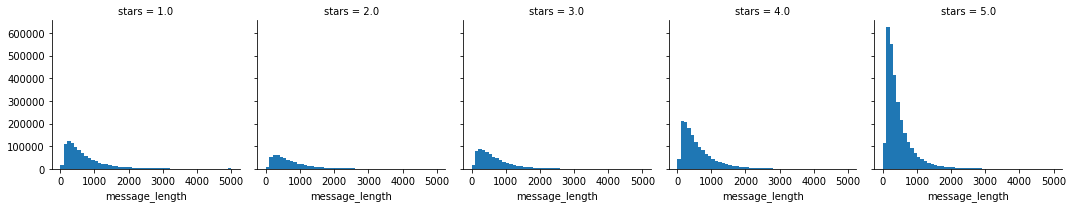

In [26]:
main(0)